## Importing Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import pickle 
import joblib

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,balanced_accuracy_score,accuracy_score
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,RandomForestClassifier
from sklearn.model_selection import learning_curve

## Given Data

In [2]:
url="https://raw.githubusercontent.com/kxerxess/Diabetes-Prediction/master/data/diabetes-FINAL.csv"
df = pd.read_csv(url)
df.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,...,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
0,0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,...,0,0,0,1,1,0,1176.0,0.120000,0.294985,0
1,1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0,...,0,1,0,1,1,1,771.4,0.032258,0.302439,1
2,2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,...,0,0,0,1,1,0,745.6,0.250000,0.188791,1
3,3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,...,0,1,0,1,1,1,646.3,0.047619,0.223404,1
4,4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,...,0,0,0,1,1,0,1508.5,0.000000,0.196429,0


## Working On Data

In [3]:
#dropping unwanted columns for prediction

df = df.drop(columns=['Unnamed: 0','DiabetesPedigreeFunction'])
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome,F0,F1,...,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
0,6,148.0,72.0,35.0,169.5,33.6,50,1,0,0,...,0,0,0,1,1,0,1176.0,0.120000,0.294985,0
1,1,85.0,66.0,29.0,102.5,26.6,31,0,0,1,...,0,1,0,1,1,1,771.4,0.032258,0.302439,1
2,8,183.0,64.0,32.0,169.5,23.3,32,1,0,1,...,0,0,0,1,1,0,745.6,0.250000,0.188791,1
3,1,89.0,66.0,23.0,94.0,28.1,21,0,1,1,...,0,1,0,1,1,1,646.3,0.047619,0.223404,1
4,0,137.0,40.0,35.0,168.0,43.1,33,1,0,0,...,0,0,0,1,1,0,1508.5,0.000000,0.196429,0


In [4]:
y = df.loc[:,'Outcome'].values
x = df.loc[:,df.columns!='Outcome'].values

In [5]:
#saving Scaler

#scaler = MinMaxScaler((0,1))
#scaler.fit(x)
#joblib.dump(scaler, "Scaler_MinMax_0_1.pkl") 

#already saved

In [6]:
#loading scaler

scaler_loaded = joblib.load("Scaler/Scaler_MinMax_0_1.pkl") 

In [7]:
x_scaled = scaler_loaded.transform(x)
print(x_scaled[0])

[0.35294118 0.67096774 0.48979592 0.30434783 0.18689904 0.31492843
 0.48333333 0.         0.         0.         0.         0.
 0.         0.         1.         1.         0.         0.28815534
 0.32571429 0.1463617  0.        ]


In [8]:
x_train,x_test,y_train,y_test=tts(x_scaled, y, test_size=0.2, random_state=42)

## Learning Curve Function

In [9]:
values = {}
def learning_curve_plot(clf):
    train_sizes,train_scores,test_scores = learning_curve(clf,x_scaled,y,cv=10,scoring="accuracy",n_jobs=-1,train_sizes=np.linspace(0.01,1,50), verbose = 1)
    train_mean = np.mean(train_scores, axis = 1)
    train_std = np.std(train_scores, axis = 1)
    test_mean = np.mean(test_scores, axis = 1)
    test_std = np.std(test_scores, axis = 1)
    plt.plot(train_sizes,train_mean,label = "Training score")
    plt.plot(train_sizes,test_mean,label = "Cross Validation")
    plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std,color="#DDDDDD" )
    plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std,color="#DDDDDD" )
    plt.title("Learning Curve")
    plt.xlabel("Training Size")
    plt.ylabel("Accuracy Score")
    plt.legend(loc=4)
    plt.show()

### LogisticRegression

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

[learning_curve] Training set sizes: [  6  20  34  48  62  76  90 104 118 132 146 160 174 188 202 216 230 244
 258 272 286 300 314 328 341 355 369 383 397 411 425 439 453 467 481 495
 509 523 537 551 565 579 593 607 621 635 649 663 677 691]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.4s finished


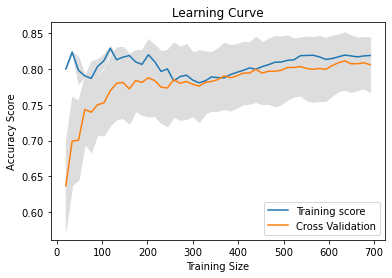

In [10]:
logReg=LogisticRegression()
logReg.fit(x_train, y_train)
pred=logReg.predict(x_test)
print(classification_report(y_test,pred))
values["LogisticRegression"]=accuracy_score(y_test,pred)
learning_curve_plot(logReg)

###  RandomForestClassifier

              precision    recall  f1-score   support

           0       0.90      0.89      0.89        99
           1       0.80      0.82      0.81        55

    accuracy                           0.86       154
   macro avg       0.85      0.85      0.85       154
weighted avg       0.86      0.86      0.86       154

[learning_curve] Training set sizes: [  6  20  34  48  62  76  90 104 118 132 146 160 174 188 202 216 230 244
 258 272 286 300 314 328 341 355 369 383 397 411 425 439 453 467 481 495
 509 523 537 551 565 579 593 607 621 635 649 663 677 691]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.1min finished


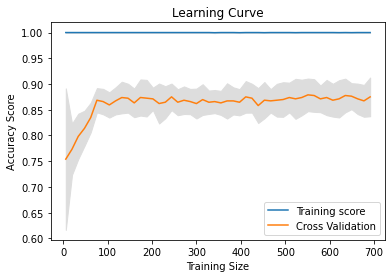

In [11]:
rfc=RandomForestClassifier()
rfc.fit(x_train, y_train)
pred=rfc.predict(x_test)
print(classification_report(y_test,pred))
values["RandomForestClassifier"]=accuracy_score(y_test,pred)
learning_curve_plot(rfc)

In [12]:
#joblib.dump(rfc, 'Model_RandomForestClassifier.pkl')

### SVC

              precision    recall  f1-score   support

           0       0.80      0.81      0.80        99
           1       0.65      0.64      0.64        55

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154

[learning_curve] Training set sizes: [  6  20  34  48  62  76  90 104 118 132 146 160 174 188 202 216 230 244
 258 272 286 300 314 328 341 355 369 383 397 411 425 439 453 467 481 495
 509 523 537 551 565 579 593 607 621 635 649 663 677 691]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.4s finished


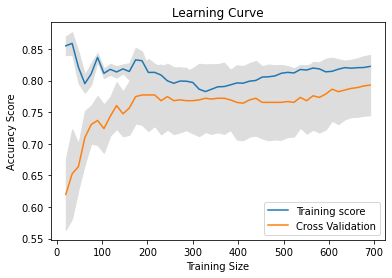

In [13]:
svc=SVC()
svc.fit(x_train, y_train)
pred=svc.predict(x_test)
print(classification_report(y_test,pred))
values["SVC"]=accuracy_score(y_test,pred)
learning_curve_plot(svc)

### KNeighborsClassifier

              precision    recall  f1-score   support

           0       0.77      0.76      0.76        99
           1       0.57      0.58      0.58        55

    accuracy                           0.69       154
   macro avg       0.67      0.67      0.67       154
weighted avg       0.70      0.69      0.70       154

[learning_curve] Training set sizes: [  6  20  34  48  62  76  90 104 118 132 146 160 174 188 202 216 230 244
 258 272 286 300 314 328 341 355 369 383 397 411 425 439 453 467 481 495
 509 523 537 551 565 579 593 607 621 635 649 663 677 691]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    8.1s finished


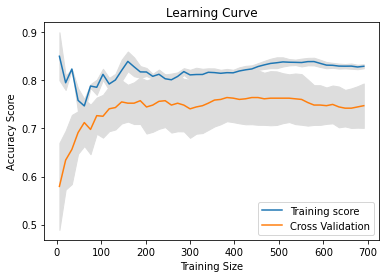

In [14]:
knn=KNeighborsClassifier()
knn.fit(x_train, y_train)
pred=knn.predict(x_test)
print(classification_report(y_test,pred))
values["KNeighborsClassifier"]=accuracy_score(y_test,pred)
learning_curve_plot(knn)

### DecisionTreeClassifier

              precision    recall  f1-score   support

           0       0.88      0.87      0.87        99
           1       0.77      0.78      0.77        55

    accuracy                           0.84       154
   macro avg       0.82      0.83      0.82       154
weighted avg       0.84      0.84      0.84       154

[learning_curve] Training set sizes: [  6  20  34  48  62  76  90 104 118 132 146 160 174 188 202 216 230 244
 258 272 286 300 314 328 341 355 369 383 397 411 425 439 453 467 481 495
 509 523 537 551 565 579 593 607 621 635 649 663 677 691]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.5s finished


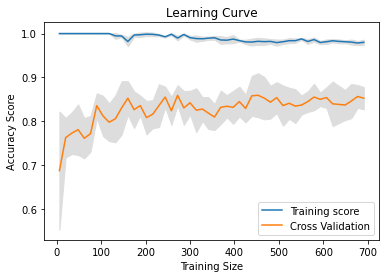

In [15]:
dtree=DecisionTreeClassifier(criterion='entropy', max_depth=8)
dtree.fit(x_train, y_train)
pred=dtree.predict(x_test)
print(classification_report(y_test,pred))
values["DecisionTreeClassifier"]=accuracy_score(y_test,pred)
learning_curve_plot(dtree)

In [16]:
#joblib.dump(tree, 'Model_DecisionTreeClassifier.pkl')

### AdaBoostClassifier

              precision    recall  f1-score   support

           0       0.88      0.87      0.87        99
           1       0.77      0.78      0.77        55

    accuracy                           0.84       154
   macro avg       0.82      0.83      0.82       154
weighted avg       0.84      0.84      0.84       154

[learning_curve] Training set sizes: [  6  20  34  48  62  76  90 104 118 132 146 160 174 188 202 216 230 244
 258 272 286 300 314 328 341 355 369 383 397 411 425 439 453 467 481 495
 509 523 537 551 565 579 593 607 621 635 649 663 677 691]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   35.0s finished


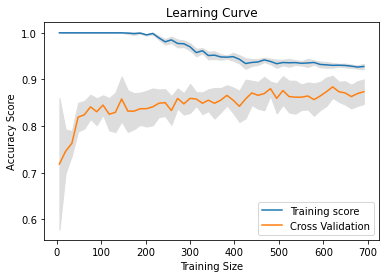

In [17]:
adaBC=AdaBoostClassifier()
adaBC.fit(x_train, y_train)
pred=adaBC.predict(x_test)
print(classification_report(y_test,pred))
accuracy_score(y_test,pred)
values["AdaBoostClassifier"]=accuracy_score(y_test,pred)
learning_curve_plot(adaBC)

### BaggingClassifier


              precision    recall  f1-score   support

           0       0.92      0.85      0.88        99
           1       0.76      0.87      0.81        55

    accuracy                           0.86       154
   macro avg       0.84      0.86      0.85       154
weighted avg       0.87      0.86      0.86       154

[learning_curve] Training set sizes: [  6  20  34  48  62  76  90 104 118 132 146 160 174 188 202 216 230 244
 258 272 286 300 314 328 341 355 369 383 397 411 425 439 453 467 481 495
 509 523 537 551 565 579 593 607 621 635 649 663 677 691]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   10.4s finished


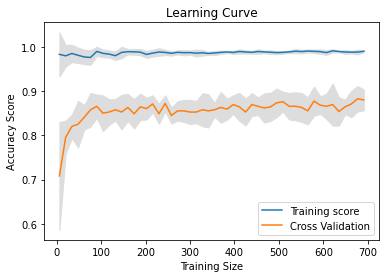

In [18]:
bagging=BaggingClassifier()
bagging.fit(x_train, y_train)
pred=bagging.predict(x_test)
print(classification_report(y_test,pred))
values["BaggingClassifier"]=accuracy_score(y_test,pred)
learning_curve_plot(bagging)

In [19]:
#joblib.dump(bagging, 'Model_BaggingClassifier.pkl') 

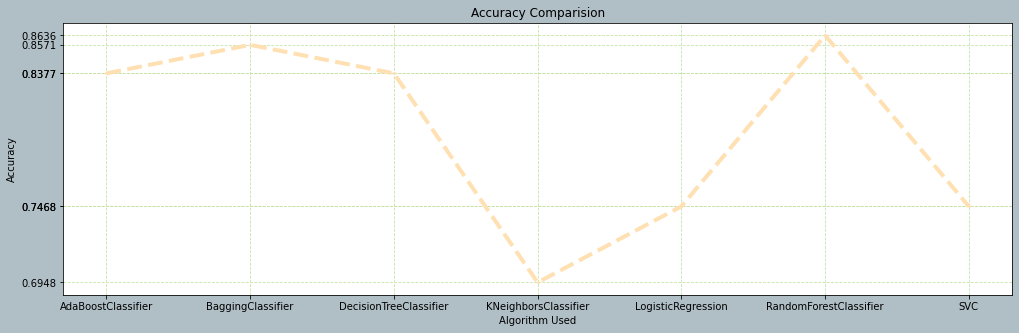

In [20]:
lists = sorted(values.items())
x, y = zip(*lists)
plt.figure(figsize=[17,5],facecolor="#b0bec5")
plt.xlabel("Algorithm Used")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparision")
plt.plot(x,y, color ="#ffe0b2", alpha=1, linestyle="--", linewidth=4, marker="o", markersize=2)
plt.yticks(y)
plt.grid(color="#c5e1a5", linestyle="--")
plt.show()

## Testing Model

In [21]:
# 0 Pregnancies         6.000000
# 1 Glucose           148.000000
# 2 BloodPressure      72.000000
# 3 SkinThickness      35.000000
# 4 Insulin           169.500000
# 5 BMI                33.600000
# 6 Age                50.000000
#  Outcome             1.000000
input_data = [[1,85,66,29,102.5,26.6,31]]

In [22]:
label= ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","Age"]
data = pd.DataFrame(input_data, columns=label)
#f0
data.loc[:,'F0']=0
data.loc[(data['Age']<=30) & (data['Glucose']<=120),'F0']=1
data.head()
#f1
data.loc[:,'F1']=0
data.loc[(data['BMI']<=30),'F1']=1
data.head()
#f2
data.loc[:,'F2']=0
data.loc[(data['Age']<=30) & (data['Pregnancies']<=6),'F2']=1
data.head()
#f3
data.loc[:,'F3']=0
data.loc[(data['Glucose']<=105) & (data['BloodPressure']<=80),'F3']=1
data.head()
#f4
data.loc[:,'F4']=0
data.loc[(data['BMI']<30) & (data['SkinThickness']<=20),'F4']=1
data.head()
#f5
data.loc[:,'F5']=0
data.loc[(data['Glucose']<=105) & (data['BMI']<=30),'F5']=1
data.head()
#f6
data.loc[:,'F6']=0
data.loc[(data['SkinThickness']<=20) ,'F6']=1
data.head()
#f7
data.loc[:,'F7']=0
data.loc[(data['Insulin']<200),'F7']=1
data.head()
#f8
data.loc[:,'F8']=0
data.loc[(data['BloodPressure']<80),'F8']=1
data.head()
#f9
data.loc[:,'F9']=0
data.loc[(data['Pregnancies']<4) & (data['Pregnancies']!=0) ,'F9']=1
data.head()
#f10,f11,f12
data['F10'] = data['BMI'] * data['SkinThickness']
data['F11'] =  data['Pregnancies'] / data['Age']
data['F12'] = data['Age'] / data['Insulin']
data.head()
#f13
data.loc[:,'F13']=0
data.loc[(data['F10']<1034) ,'F13']=1

testing_data = data

In [23]:
testing_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,F0,F1,F2,...,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
0,1,85,66,29,102.5,26.6,31,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,771.4,0.032258,0.302439,1.0


In [24]:
testing_data_x = testing_data.loc[:,].values
testing_data_x

array([[1.00000000e+00, 8.50000000e+01, 6.60000000e+01, 2.90000000e+01,
        1.02500000e+02, 2.66000000e+01, 3.10000000e+01, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 7.71400000e+02, 3.22580645e-02, 3.02439024e-01,
        1.00000000e+00]])

In [25]:
testing_data_x_scaled = scaler_loaded.transform(testing_data_x)
testing_data_x_scaled

array([[0.05882353, 0.26451613, 0.42857143, 0.23913043, 0.10637019,
        0.17177914, 0.16666667, 0.        , 1.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 1.        ,
        1.        , 1.        , 0.17592233, 0.0875576 , 0.15053899,
        1.        ]])

In [26]:
print(rfc.predict(testing_data_x_scaled))

[0]


In [27]:
rfc_loaded = joblib.load("Trained_Models/Model_RandomForestClassifier_88.pkl") 
print(rfc_loaded.predict(testing_data_x_scaled))


[0]


In [28]:
print(bagging.predict(testing_data_x_scaled))

[0]


In [29]:
bagging_loaded = joblib.load("Trained_Models/Model_BaggingClassifier_88.pkl") 
print(bagging_loaded.predict(testing_data_x_scaled))

[0]
